<a href="https://colab.research.google.com/github/Kennedy-creat/Student-Enrollment-Prediction/blob/main/Student_Enrollment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_students = 200  # Adjust this number if you want a bigger or smaller dataset

data = {
    'GPA': np.round(np.random.uniform(2.0, 4.0, num_students), 2),  # GPA between 2.0 and 4.0
    'Age': np.random.randint(18, 30, num_students),  # Age between 18 and 30
    'Attendance': np.round(np.random.uniform(50, 100, num_students), 2),  # Attendance percentage
    'FamilyIncome': np.random.randint(10000, 100000, num_students),  # Family income in a wide range
    'Enrolled': np.random.choice([0, 1], num_students, p=[0.3, 0.7])  # 0 = Not Enrolled, 1 = Enrolled
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Show the first few rows
df.head()


,GPA,Age,Attendance,FamilyIncome,Enrolled
0,2.75,25,67.32,67091,1
1,3.90,21,73.23,31949,0
2,3.46,28,82.49,80080,1
3,3.20,18,52.40,47744,1
4,2.31,25,97.46,55543,1


In [4]:
df.to_csv('synthetic_student_data.csv', index=False)


In [5]:
data = pd.read_csv('synthetic_student_data.csv')


In [6]:
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GPA           200 non-null    float64
 1   Age           200 non-null    int64  
 2   Attendance    200 non-null    float64
 3   FamilyIncome  200 non-null    int64  
 4   Enrolled      200 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


In [7]:
data = data.dropna()  # Drop rows with missing values


In [8]:
features = data[['GPA', 'Age', 'Attendance', 'FamilyIncome']]
target = data['Enrolled']  # Assuming 'Enrolled' is the column to predict


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6333333333333333
              precision    recall  f1-score   support

           0       0.25      0.11      0.15        18
           1       0.69      0.86      0.77        42

    accuracy                           0.63        60
   macro avg       0.47      0.48      0.46        60
weighted avg       0.56      0.63      0.58        60



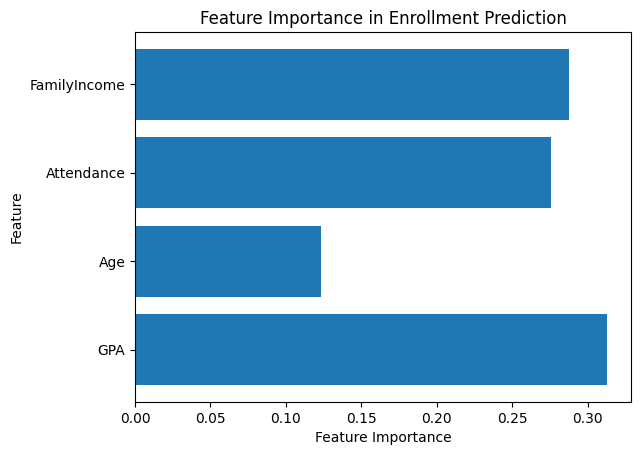

In [13]:
feature_importances = model.feature_importances_
features_list = features.columns
plt.barh(features_list, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Enrollment Prediction")
plt.show()


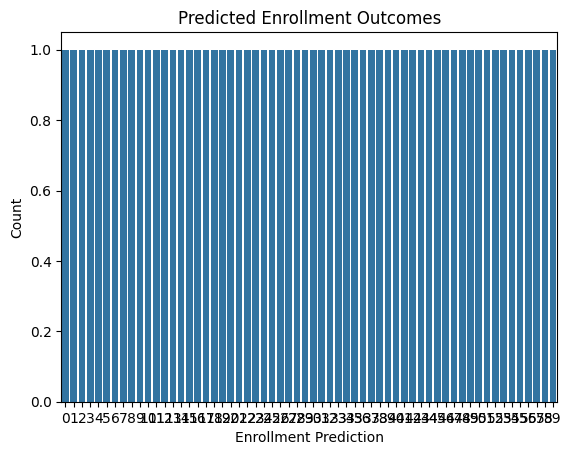

In [14]:
sns.countplot(y_pred)
plt.title("Predicted Enrollment Outcomes")
plt.xlabel("Enrollment Prediction")
plt.ylabel("Count")
plt.show()
